## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]  # rows in the dataset

294478

c. The number of unique users in the dataset.

In [4]:
# unique users
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()  # propotion of users converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# rows where new_page doesn't match treatment
df.query('group =="treatment" and landing_page != "new_page" \
           or group == "control" and landing_page =="new_page" ').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()  # rows with missing values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# 
indices = df.query('group =="treatment" and landing_page != "new_page" \
           or group == "control" and landing_page != "old_page"').index.values
indices

array([    22,    240,    308, ..., 294252, 294253, 294331])

In [9]:
df2 = df.drop(indices)


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# Unique user_ids
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# repeated user_id in df2
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
# repeated user_id in df2
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
#removing duplicates
df2 = df2.drop_duplicates(subset='user_id')
df2.shape[0]

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# probability of converting regardless of the page
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#probability of a user converting tn the control group
prob_control = df2.query('group == "control"').converted.mean()
prob_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# probability of a user converting in the treatment group
prob_treatment = df2.query('group =="treatment"').converted.mean()
prob_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
# probability of a user receiving a landing_page
prob_newpage = df2.query('landing_page =="new_page"').count()/ df2.shape[0]
prob_newpage.landing_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [19]:
# The obs difference between treatment converted and control converted
diff = prob_treatment - prob_control
diff

-0.0015782389853555567

***From the above observed diffference we can not conclude that the new treatement page leads to more conversions. This is because there is more conversions from the control group compaired to the new treatment group.***

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The hyposthesis is
1. null hypothesis= $p_{new}$ < = $p_{old}$
*** 
2. altenative hypothesis = $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
# conversion rate for pnew
prob_new = df2.converted.mean()
prob_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
# Pold is equal to Pold
prob_old = df2.converted.mean()
prob_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
#nuber of individuals in the treatment group
new_page = df2.query('landing_page =="new_page"')
new_page = new_page.shape[0] 
new_page

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
# number of individuals in the control group
old_page = df2.query('landing_page =="old_page"')
old_page = old_page.shape[0]
old_page

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
# simulation using random.binomial for the treatment group
new_page_converted = np.random.binomial(new_page,prob_new)
new_page_converted

17432

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
# simulation using random.binomial for the control group
old_page_converted = np.random.binomial(old_page, prob_old)
old_page_converted

17201

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# Finding the mean difference between new page converted and old page converted 
diffs  = (new_page_converted/new_page)- (old_page_converted/old_page)
diffs

0.0015603706670170026

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
# simulating mean diff for 10000 values
new_converted_simulation = np.random.binomial(new_page, prob_new, 10000)/new_page
old_converted_simulation = np.random.binomial(old_page, prob_old, 10000)/old_page
p_diffs = new_converted_simulation - old_converted_simulation


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

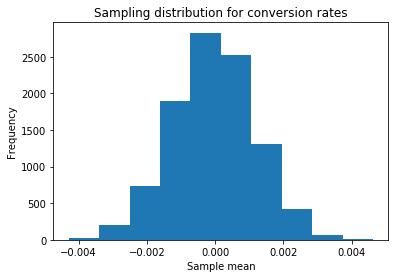

In [28]:
# ploting the graph
plt.hist(p_diffs)

plt.title('Sampling distribution for conversion rates')
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
obs_diff = prob_treatment - prob_control
# converting the p_diffs to an array
p_diffs = np.array(p_diffs)

# propotion of p_diffs greater than actual data
(p_diffs > obs_diff).mean()

0.8988

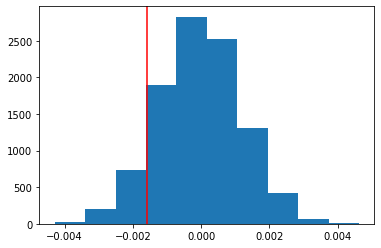

In [30]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color ='r')
plt.show()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>
*The p-value is the probability of rejecting a null hypothesis falsely.The p-value associated with a 95% confidence interval is 0.05
 A The p-value is 0.0942 which is greater than α level of 0.05. Therefore we fail to reject the null hypothesis.*



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = sum(df.query('group == "control"')['converted'])
convert_new = sum(df.query('group =="treatment"')['converted'])

n_old = len(df.query('group == "control"'))
n_new = len(df.query('group =="treatment"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_test, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_test, p_value

(1.2369217547321678, 0.8919419336512124)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score is positive if the value lies above the mean, and negative if it lies below the mean.
 

>
*The Z-score is the number of standard deviations of a data point from the population mean.
The p-value is the probability of rejecting a null hypothesis falsely.
The critical z-score values when using a 95% confindence interval are -1.96 and +1.96 standard deviations. The p-value associated with a 95% confidence interval is 0.05. Since our z-score lies between the critical value and our p-value is larger than 0.05, We fail to reject the null hypothesis. which direcly corresponds to part j. and k.*

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Because it is a categorical data comprising of yes and no the best model would be the logistic regression

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


In [34]:
# creating dummies
df2['intercept'] = 1
df2[['control','treatment']] = pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2['ab_page'] = df2['treatment']

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
# instantiating the regression model
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# model summary
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        17:23:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The hyposthesis is
1. null hypothesis= $p_{old}$ -$p_{new}$ = 0
2. altenative hypothesis = $p_{old}$ - $p_{new}$ !=0
 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> *Adding aditional independent variables to the model to predict the dependant variable is a good idea. 
The associated change in the R-squared represents the improvement in the goodness of fit that is associated with the additional variables added to the model. For example basing on our previous model, one can add the location of users to asses their impact on our model.*

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
# checking the country data
country = pd.read_csv('countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# Merging the two dataframes together 
new_data = country.set_index('user_id').join(df2.set_index('user_id'), how='inner')
new_data.head()

,country,timestamp,group,landing_page,converted,intercept,treatment,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1


In [39]:
# finding the unique  entities in the country column 
new_data.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [40]:
# Adding the intercept and creating dummie valiables
new_data['intercept'] = 1
new_data[['UK','US','CA']] = pd.get_dummies(new_data['country'])
new_data.drop(labels='UK', axis=1, inplace=True)
new_data.head()

,country,timestamp,group,landing_page,converted,intercept,treatment,ab_page,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,1,0


In [41]:
# instantiating the regression model
logit = sm.Logit(new_data['converted'], new_data[['intercept', 'US','CA']])
result = logit.fit()
result.summary()
                                                 

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:               1.521e-05
Time:                        17:23:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0507      0.028      1.786      0.074      -0.005       0.106
CA             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
# Intraction between page conversion and individual country 
new_data['intercept'] = 1
new_data['CA_ab_page'] = new_data['CA']*new_data['ab_page']

In [43]:
# instantiating the regression model
more_logit = sm.Logit(new_data['converted'], new_data[['intercept','ab_page', 'CA','CA_ab_page' ]])
results = more_logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 23 Aug 2020   Pseudo R-squ.:               1.077e-05
Time:                        17:23:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.5143
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9942      0.015   -135.158      0.000      -2.023      -1.965
ab_page       -0.0019      0.021     -0.093      0.926      -0.043       0.039
CA             0.0077      0.018      0.436      0.663      -0.027       0.042
CA_ab_page    -0.0186      0.025     -0.746      0.456      -0.068       0.030
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions from the Regression

> In both cases the the p-values are greater than 0.05. Therefore we fail to reject the null hypothesis. Therefore we advice the company to keep using the old page because there is no evidence to support the fact that the new page is better than the old page. 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

255